## Get Data

In [ ]:
from google.colab import drive
from psutil import virtual_memory

drive.mount('/content/gdrive/', force_remount=True)
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Mounted at /content/gdrive/
Your runtime has 54.8 gigabytes of available RAM



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
os.chdir("gdrive/MyDrive/Dissertation/ukdale")

In [ ]:
data = pd.read_csv('processed_data/125_tsfresh_labeled.csv', index_col=[0])
print(data.shape)

house_1_features = data.loc[:568302,~data.columns.isin(['1','2','3'])]
house_1_labels = data['1'].loc[:568302,]
print(f'House 1 features: {house_1_features.shape}')
print(f'House 1 labels: {house_1_labels.shape}')

house_2_features = data.loc[568303:741073,~data.columns.isin(['1','2','3'])]
house_2_labels = data['1'].loc[568303:741073]
print(f'House 2 features: {house_2_features.shape}')
print(f'House 2 labels: {house_2_labels.shape}')

house_5_features = data.loc[741074:931116,~data.columns.isin(['1','2','3'])]
house_5_labels = data['1'].loc[741074:931116]
print(f'House 5 features: {house_5_features.shape}')
print(f'House 5 labels: {house_5_labels.shape}')

(931117, 792)
House 1 features: (568303, 789)
House 1 labels: (568303,)
House 2 features: (172771, 789)
House 2 labels: (172771,)
House 5 features: (190043, 789)
House 5 labels: (190043,)


### Train:Test = 80:20

In [ ]:
Xtr, Xt, ytr, yt = train_test_split(house_1_features, house_1_labels, test_size=0.2, random_state=43, shuffle=True, stratify=house_1_labels)

## Feature engineering

### Find and drop correlated features

In [ ]:
def correlation(data, threshold):
    corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (corr_mat.iloc[i,j]) > threshold:
                col = corr_mat.columns[i]
                corr.add(col)
    return corr

In [ ]:
# Find correlated columns in train data
cols = correlation(Xtr, 0.85)
print(len(set(cols)))

# Remove correlated columns from train and test data
Xtr = Xtr.drop(cols, axis=1)
Xt = Xt.drop(cols, axis=1)
house_2_features = house_2_features.drop(cols, axis=1)
house_5_features = house_5_features.drop(cols, axis=1)

113


### Scaling and encoding features and labels

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtr)
X_test = scaler.transform(Xt)
house_2 = scaler.transform(house_2_features)
house_5 = scaler.transform(house_5_features)

y_train = ytr
y_test = yt

## Performance metrics

In [ ]:
# Define performance metrics
def model_scores(ytest, ypred):
    print(classification_report(ytest, ypred))

    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize = (10,7))

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax = ax)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    # ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Fridge OFF', 'Fridge ON']); ax.yaxis.set_ticklabels(['Fridge OFF', 'Fridge ON']);

# Learning models

## KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Testing

#### **Testing on house 1 data**

In [ ]:
y_pred = neigh.predict(X_test)
model_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     63742
           1       0.59      0.58      0.59     49919

    accuracy                           0.64    113661
   macro avg       0.63      0.63      0.63    113661
weighted avg       0.64      0.64      0.64    113661



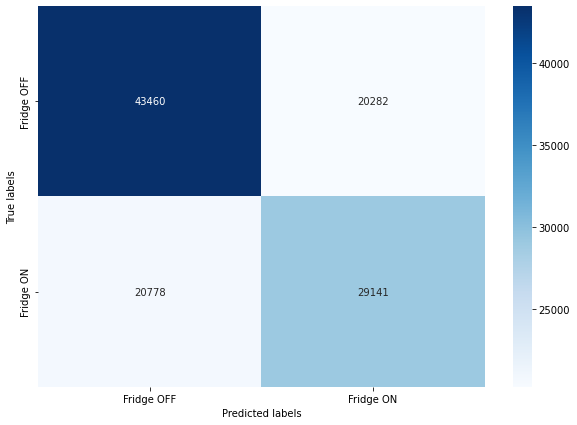

In [ ]:
model_scores(y_test, y_pred)

#### **Testing on house 2 data**

              precision    recall  f1-score   support

           0       0.00      0.64      0.00        14
           1       1.00      0.44      0.62    172757

    accuracy                           0.44    172771
   macro avg       0.50      0.54      0.31    172771
weighted avg       1.00      0.44      0.62    172771



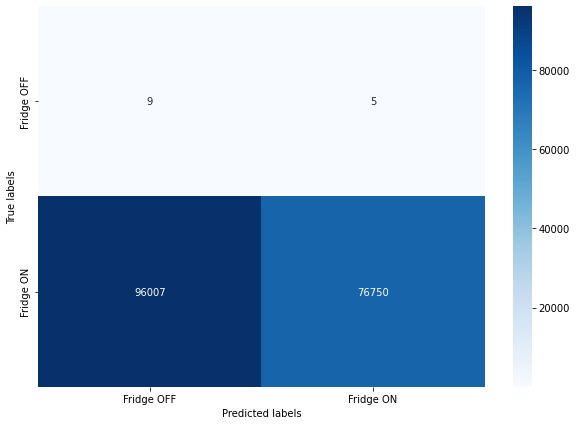

In [ ]:
house2_pred = neigh.predict(house_2)
model_scores(house_2_labels, house2_pred)

#### Testing on house 5 data

              precision    recall  f1-score   support

           0       0.63      0.37      0.47    119543
           1       0.37      0.64      0.47     70500

    accuracy                           0.47    190043
   macro avg       0.50      0.50      0.47    190043
weighted avg       0.54      0.47      0.47    190043



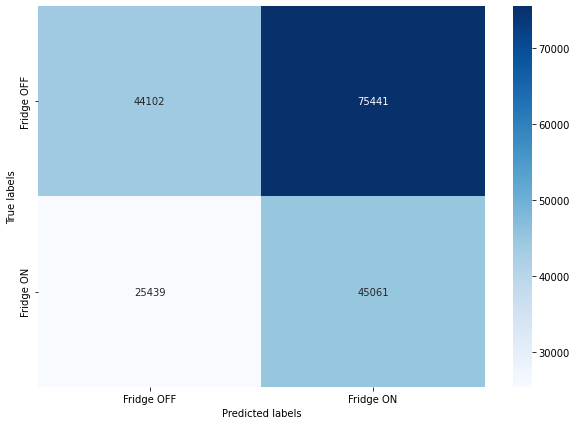

In [ ]:
house5_pred = neigh.predict(house_5)
model_scores(house_5_labels, house5_pred)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

#### **Testing on house 1 data**

              precision    recall  f1-score   support

           0       0.83      0.74      0.78     63742
           1       0.71      0.81      0.75     49919

    accuracy                           0.77    113661
   macro avg       0.77      0.77      0.77    113661
weighted avg       0.78      0.77      0.77    113661



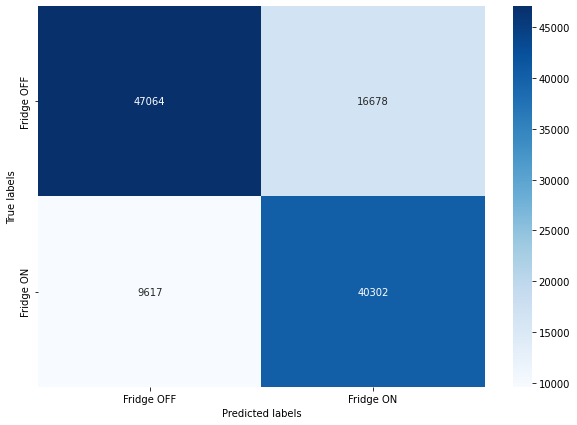

In [ ]:
y_pred = rfc.predict(X_test)
model_scores(y_test, y_pred)

#### **Testing on house 2 data**

              precision    recall  f1-score   support

           0       0.00      0.43      0.00        14
           1       1.00      0.30      0.46    172757

    accuracy                           0.30    172771
   macro avg       0.50      0.36      0.23    172771
weighted avg       1.00      0.30      0.46    172771



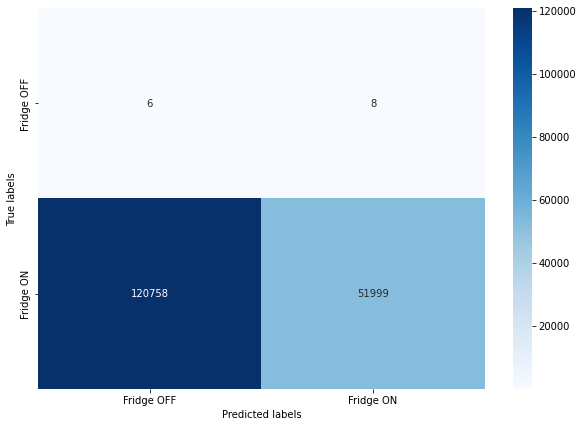

In [ ]:
house2_pred = rfc.predict(house_2)
model_scores(house_2_labels, house2_pred)

#### Testing on house 5 data

              precision    recall  f1-score   support

           0       0.75      0.20      0.31    119543
           1       0.40      0.89      0.55     70500

    accuracy                           0.46    190043
   macro avg       0.58      0.54      0.43    190043
weighted avg       0.62      0.46      0.40    190043



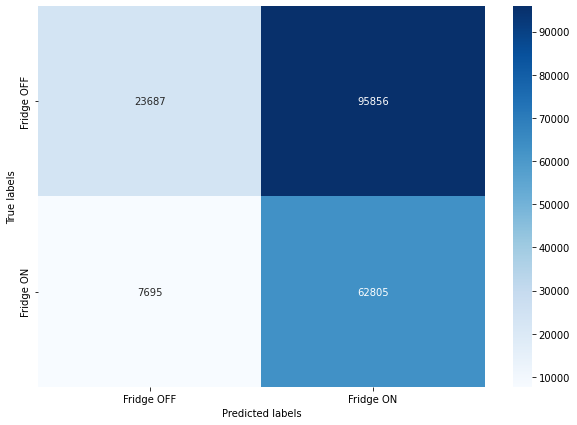

In [ ]:
house5_pred = rfc.predict(house_5)
model_scores(house_5_labels, house5_pred)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

#### **Testing on house 1 data**

              precision    recall  f1-score   support

           0       0.76      0.69      0.72     63742
           1       0.64      0.72      0.68     49919

    accuracy                           0.70    113661
   macro avg       0.70      0.71      0.70    113661
weighted avg       0.71      0.70      0.70    113661



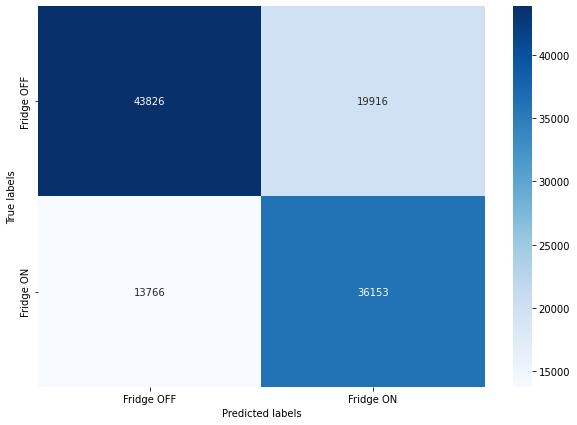

In [ ]:
y_pred = lr.predict(X_test)
model_scores(y_test, y_pred)

#### **Testing on house 2 data**

              precision    recall  f1-score   support

           0       0.00      1.00      0.00        14
           1       1.00      0.07      0.13    172757

    accuracy                           0.07    172771
   macro avg       0.50      0.53      0.06    172771
weighted avg       1.00      0.07      0.13    172771



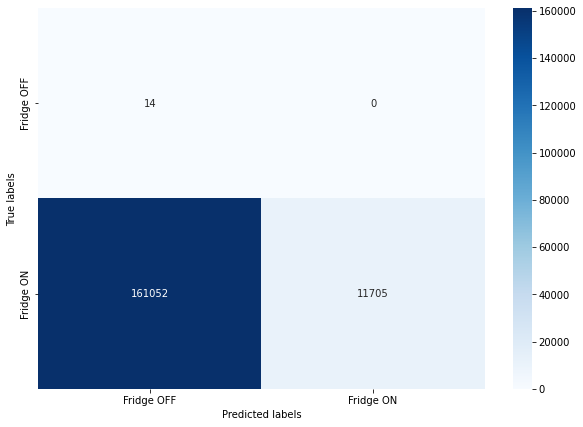

In [ ]:
house2_pred = lr.predict(house_2)
model_scores(house_2_labels, house2_pred)

#### Testing on house 5 data

              precision    recall  f1-score   support

           0       0.63      1.00      0.77    119543
           1       0.48      0.01      0.01     70500

    accuracy                           0.63    190043
   macro avg       0.56      0.50      0.39    190043
weighted avg       0.58      0.63      0.49    190043



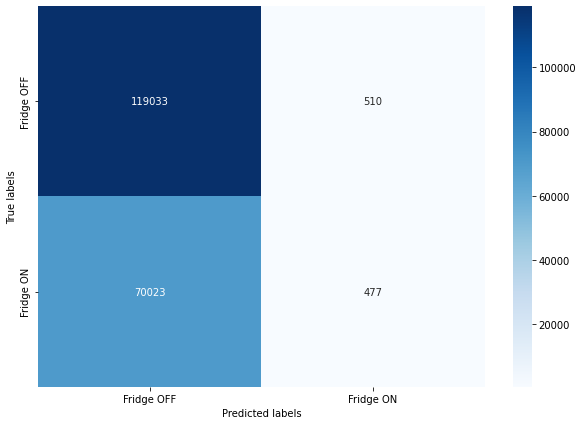

In [ ]:
house5_pred = lr.predict(house_5)
model_scores(house_5_labels, house5_pred)

In [ ]:
np.unique(house_5_labels,return_counts=True)

(array([0, 1]), array([119543,  70500]))

In [ ]:
np.unique(house_2_labels,return_counts=True)

In [ ]:
np.unique(house_1_labels,return_counts=True)

(array([0, 1]), array([318707, 249596]))